## Time Series forecasting fundamentals with tensorFlow + Milestone Project 3: BitPredict

## Get Data

In [1]:
!wget https://raw.githubusercontent.com/arrshsh/ML-and-DS/refs/heads/main/Bit%20Predict%20Project/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-01-25 19:10:46--  https://raw.githubusercontent.com/arrshsh/ML-and-DS/refs/heads/main/Bit%20Predict%20Project/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2025-01-25 19:10:47 (7.48 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data with pandas

In [2]:
import pandas as pd

# Let's read in the data and parse the dates
df = pd.read_csv("/kaggle/working/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates= ["Date"],
                 index_col= ["Date"]) # parscthe date column and tell pandas column 1 is "Date"
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

A small umber of samples is something which is encountered in time series forecastiing problems.


> The **seasonality** of a time series data is the number of samples per year

In [5]:
# Only wnat the closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


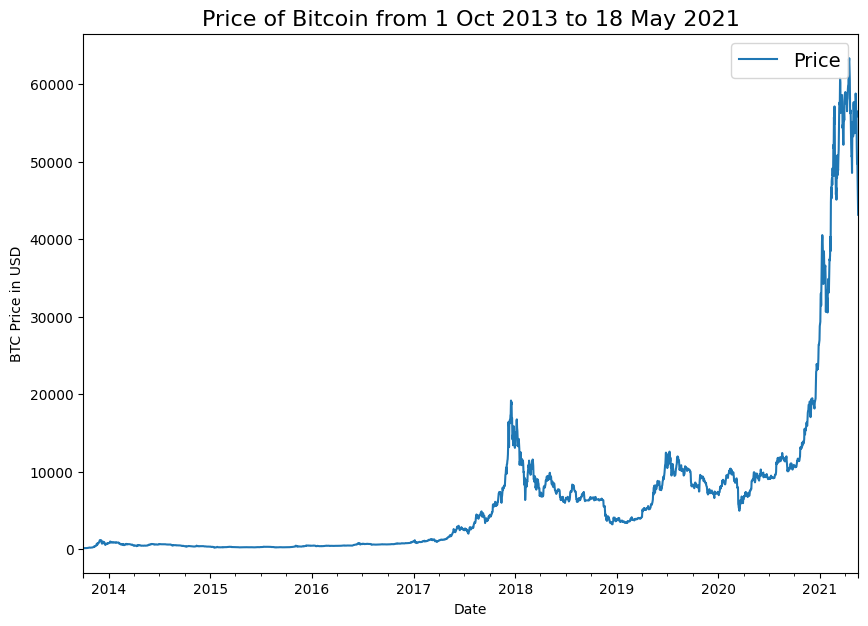

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7));
plt.ylabel("BTC Price in USD")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize = 14);

## Importing time series data with Python's CSV module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/kaggle/working/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)  # skip the header line
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))  # parse the date string into a datetime object
        btc_price.append(float(line[2]))  # convert the closing price to float

# View the first 10 elements of each list
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

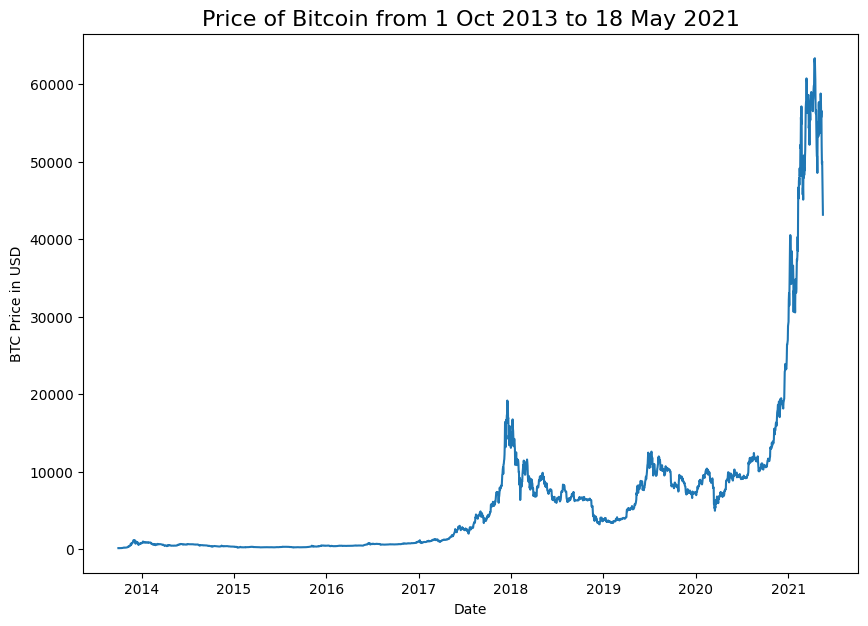

In [8]:
# import numpy as np
plt.figure(figsize= (10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price in USD")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.xlabel("Date");
# plt.legend(fontsize = 14);

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong approach)

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test split for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state= 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

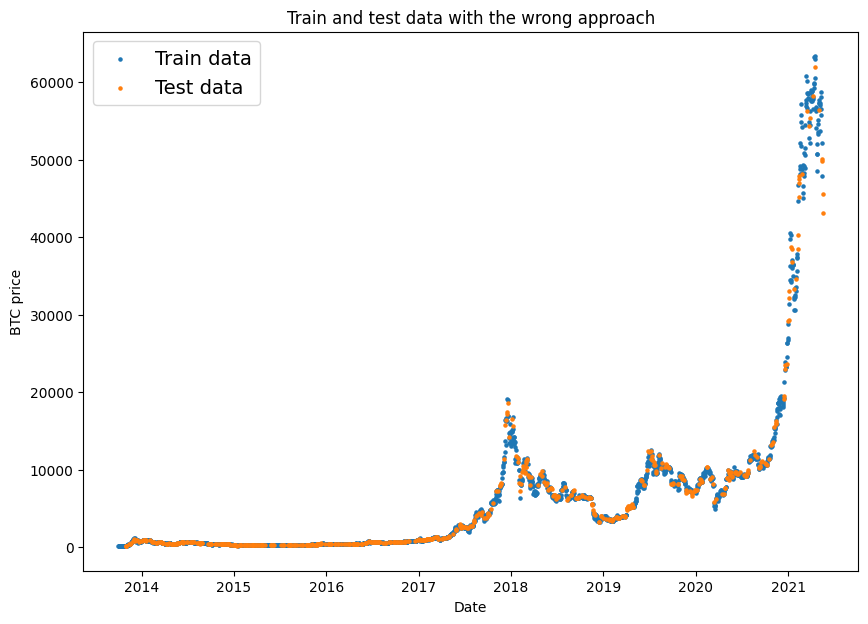

In [11]:
# Let's plot the train test split made with wrong approach
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = "Test data")
plt.legend(fontsize = 14)
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.title("Train and test data with the wrong approach")
plt.show();

### Create train and test sets for time series (the right approach)

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices))

# Create train splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

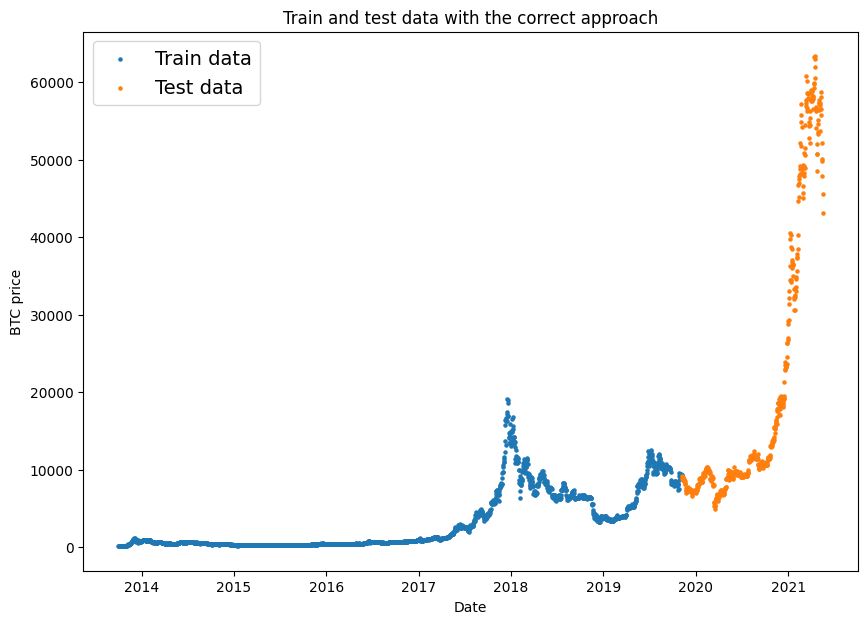

In [13]:
# Plot correctly made splits
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = "Test data")
plt.legend(fontsize = 14)
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.title("Train and test data with the correct approach")
plt.show();

## Create a plotting function

In [14]:
def plot_time_series(timesteps, values, format = ".", start = 0, end = None, label = None):
  """
  Plots a timeseries data

  Parameters
  ----------
  timesteps: array of timesteps
  values: array of values across time
  format: style of plot, default "."
  start: where to start the plot (setting a point in time from where the data should be considered)
  end: where to end the plot
  label: label to show on plot about values, default is None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price in USD")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

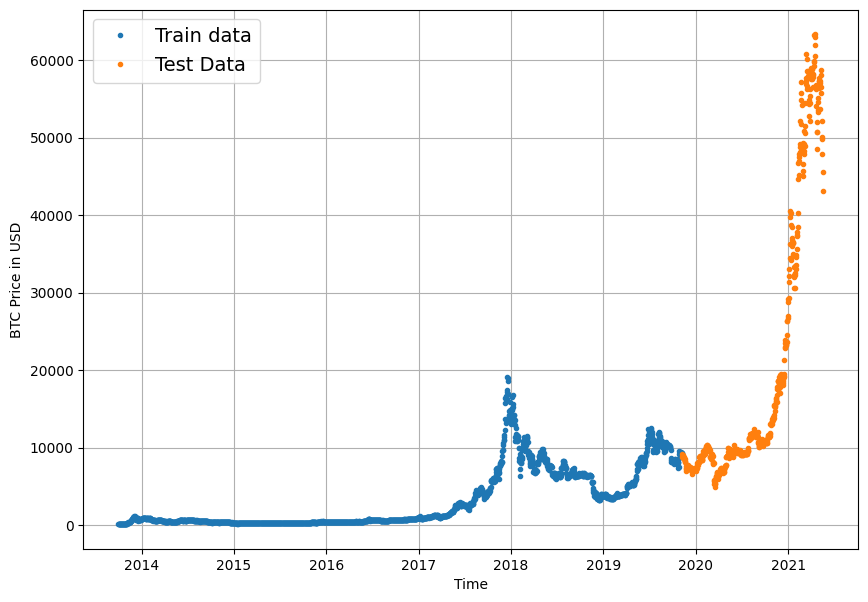

In [15]:
# Test out the plotting function
plt.figure(figsize = (10, 7))
plot_time_series(X_train, y_train, label = "Train data")
plot_time_series(X_test, y_test, label = "Test Data")

## Modelling experiments

Two new terms in time-series data:
1. **Horizon:** Number of timesteps into the future we are going to predict
2. **Window size:** Number of timesteps we're going to use to predit **horizon**


Modeeling experiments to be done:
* 0 Naive model (baseline)
* 1 Dense model, horizon =1, windsow = 7
* 2 Same architecture as 1, horizon =1, windsow = 30
* 3 Same architecture as 1, horizon =7, windsow = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1, but with multivariate data
* 7 N-BEATs algorithm
* 8 Ensemble (multiple models optimised on different loss functions)
* 9 Future prediction model
* 10 Same as 1, but with turkey data


## Model 0: Naive forecast (baseline)

The naive approach is something like this:
> The prediction at timestamp t is equal to the value at timestamp t-1 (previous timestamp). This is for horizon of 1.

In [16]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

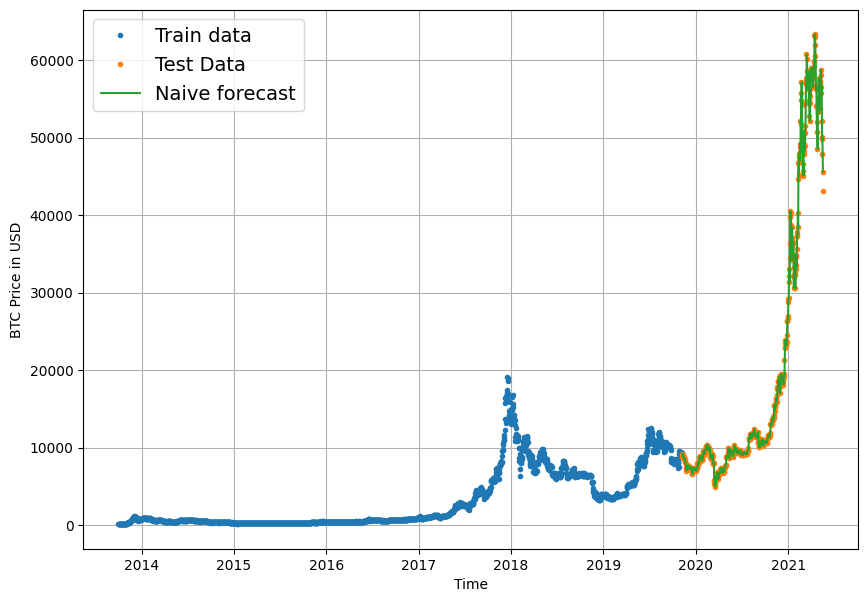

In [17]:
# Plot naive forecast
plt.figure(figsize = (10, 7))
plot_time_series(X_train, y_train, label = "Train data")
plot_time_series(X_test, y_test, label = "Test Data")
plot_time_series(X_test[1:], naive_forecast, format = "-",label = "Naive forecast")

## Evaluating a time series mdoel

since we are predicting a number, it can be considered as a "kind of" regression problem. Few time series regression metrics (which can also be used in time series forecasting):
* MAE- Mean absolute error
* MSE- Mean squared error
* RMSE- Root mean squared error
MAPE/ sMAPE- (symmetric) mean absolute percentage error
* MASE- Mean absolute scaled error

For all these, lower the vlaue of these error, better is the model

In [18]:
import tensorflow as tf

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of the naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  # The value of MASE for naive model is 1

  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [21]:
# Create a funciton to take in model predictions and truth values and return evaluations
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  # Calculate evaluation metrics
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))  # Mean Absolute Error
  mse = tf.reduce_mean(tf.square(y_true - y_pred))  # Mean Squared Error
  rmse = tf.sqrt(mse)  # Root Mean Squared Error
  mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
  mase = mean_absolute_scaled_error(y_true, y_pred)  # Mean Absolute Scaled Error

  return {"mae": mae.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy()}

In [22]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Formatting data part 2: Windowing the dataset

This is done to covert the time series forecasting into a supervised elarning problem

In [23]:
# What we want to achieve
print(f"We want to use {btc_price[:7]} to predict {btc_price[7]}")

We want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


That's like a window size of 7 for a horizon of 1

In [24]:
# Setting up global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE =7 # Use the past week Bitcoin data to predict the price for next day

In [25]:
# Create function to label windowed data
def get_labelled_windows(x, horizon = HORIZON):
  """
  Create labels for windowed dataset

  For a horizon of 1,
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], {7})
  """
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Testing out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Horizon: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Horizon: 7


In [27]:
btc_price

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883,
 164.31499,
 177.63333,
 188.29716,
 200.70166,
 180.355,
 175.03166,
 177.6965,
 187.15983,
 192.75666,
 197.4,
 196.02499,
 198.04883,
 198.93233,
 200.543,
 210.3075,
 225.02,
 248.25333,
 262.32666,
 294.48699,
 331.10325,
 285.8875,
 304.97974,
 338.137,
 357.48,
 402.954,
 409.10375,
 420.21649,
 437.29725,
 510.6025,
 693.65,
 531.54249,
 574.71599,
 681.33,
 774.18,
 746.19374,
 768.8475,
 789.36475,
 893.1815,
 934.355,
 1068.363,
 1154.92593,
 1099.51926,
 1019.78966,
 1028.845,
 1071.2848,
 1139.33083,
 1004.61633,
 759.43041,
 689.81,
 841.83966,
 916.77599,
 967.42866,
 866.29003,
 911.23204,
 889.81946,
 848.9975,
 868.95316,
 653.80483,
 654.06266,
 553.69166,
 693.05883,
 649.38965,
 595.95883,
 647.68316,
 671.58116,
 659.84333,
 702.00083,
 

We need the above to be done on the whole time series data.

This can be done using the for loops in python, but it can be cumbersome for large time-series datasets

Herein, we will be using NumPy's indexing functionality, for which we will make a preprocessing function. The function will:

1. Create a window step of a specific window size e.g. [0, 1, 2, 3, 4, 5, 6]
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps to index on a target series i.e. Bitcoin price in this scenario.
4. Use `get_labelled_windows()` function to turn the window steps into windows with a specified horizon.

In [28]:
import numpy as np
# Create functions to view NumPy arrays as windows
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size +horizon-1)), axis =0).T # Create 2D arrays window size window_size

  print(f"Window indexes: \n{window_indexes}, {window_indexes.shape}")

  # Till here, we have made mini-arrays, the values in these mini-arrrays correspond to the index of the main array whose value will be replaced with

  # 3. Index on the target array with 2D array of multiple steps
  windowed_array = x[window_indexes]
  print(f"\n\nWindowed array: \n{windowed_array}\n\n")

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon = horizon)

  return windows, labels

In [29]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexes: 
[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]], (2780, 8)


Windowed array: 
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]




(2780, 2780)

In [30]:
# View the first 3 windows and their corresponding label
for i in range(3):
  print(f"Window: {full_windows[i]} --> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Label: [125.96116]


In [31]:
# View the last 3 windows and their corresponding label
for i in range(3):
  print(f"Window: {full_windows[i-3]} --> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] --> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> Label: [43144.47129086]


> The `tf.keras.preprocessing.timeseries_dataset_from_array()` function from tensorflow does a similar preprocessing as done above.

## Turning windows into training and testing sets

In [32]:
# Make the train/ test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Split the matching window-label pairs into training and testing sets
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [33]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [34]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [35]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [36]:
# Check if the train labels are the same before and after the windowing
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because the model's performance varies from experiment to experiment, we are making a checkpoint so that we can compare the best performace of a model with the best performance of another model.

The created callback will help us in the way that if the model we are working on performs best on epoch 55, then we can load and work with the intermediate model created after epoch 55, even though we are looking train the model for some 100 epochs.

In [37]:
import os
# Create a function to implement ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
  monitor = "val_loss",
  verbose = 0, #only output some selected info
  save_best_only = True)

## Model 1: Dense model (window = 7, horizon = 1)

The first model will be a simple dense model which has:
* A single dense layer with 128 hidden units and ReLU activation.
* An output layer with linear activation or no activation
* Adam optimization and MAE loss function
* Batch size of 128 (since we have comparatively smaller data in this experiment)
* 100 epochs

Parameters are the values which the model learns by itself

On the other hand, hyperparameters are the values which the machine learning practitioner can choose

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") # linear activation is the same as having no activation
], name = "model_1_dense.keras")

# 2. Compile the model
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["mae", "mse"])

# 3. Fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name =model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 1856.8624 - mae: 1856.8624 - mse: 9720983.0000 - val_loss: 2807.7061 - val_mae: 2807.7061 - val_mse: 17938976.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 378.6721 - mae: 378.6721 - mse: 480955.5312 - val_loss: 1238.4054 - val_mae: 1238.4054 - val_mse: 4220899.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 199.4215 - mae: 199.4215 - mse: 189617.0469 - val_loss: 1208.1071 - val_mae: 1208.1071 - val_mse: 4039223.2500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 185.9663 - mae: 185.9663 - mse: 171421.8906 - val_loss: 1028.9067 - val_mae: 1028.9067 - val_mse: 3329574.2500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 175.5334 - mae: 175.5334 - mse: 156077.1094 - val_loss: 993.1994 - val_mae: 993.1994 - val_mse: 3171281.2500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169.1061 - mae: 169.1061 - mse: 150652.6094 - val_loss: 979.9067 - val_mae: 979.9067 - v

In [39]:
# Evaluate the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 283.3286 - mae: 283.3286 - mse: 345191.8438


[565.259765625, 565.259765625, 1164934.25]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/kaggle/working/model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 283.3286 - mae: 283.3286 - mse: 345191.8438


[565.259765625, 565.259765625, 1164934.25]

In [41]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Making forecasts with model (on the test data)

Let's write a function to:
* Take a train model
* Takes in some input data (data in a format which is simialr to the one in which it was trained)
* Passes the input data to the model's `predict()` method
* Returns the predictions

In [42]:
def make_preds(model, input_data):
  """
  Uses model to make prediction on input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [43]:
# Make predictions using model_1 on the test datasets
model_1_pred = make_preds(model_1, test_windows)
len(model_1_pred), model_1_pred[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8866.431, 8822.394, 9042.559, 8789.375, 8775.334, 8736.821,
        8672.167, 8583.412, 8453.545, 8545.493], dtype=float32)>)

In [44]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [45]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_pred)
model_1_results

{'mae': 565.2597,
 'mape': 2.537767,
 'mase': 0.99300474,
 'mse': 1164934.2,
 'rmse': 1079.3212}

In [46]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

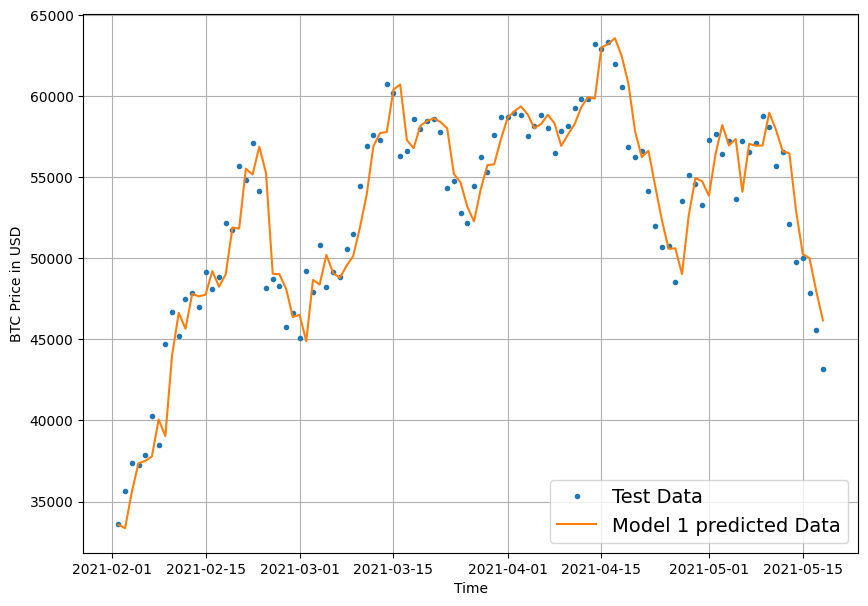

In [47]:
# Let's plot model_1 predictions
offset = 450
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_pred,
                 start = offset,
                 format = "-",
                 label = "Model 1 predicted Data")

Is autoregression in play here??

Or in terms of time-series data, it is called autocorrelation data

## Model 2: Dense (window = 30, horizon = 1)

In [48]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps, i.e. data corresponding to 30 days to learn the patterns

In [49]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices,
                                         window_size = WINDOW_SIZE,
                                         horizon = HORIZON)

Window indexes: 
[[   0    1    2 ...   28   29   30]
 [   1    2    3 ...   29   30   31]
 [   2    3    4 ...   30   31   32]
 ...
 [2754 2755 2756 ... 2782 2783 2784]
 [2755 2756 2757 ... 2783 2784 2785]
 [2756 2757 2758 ... 2784 2785 2786]], (2757, 31)


Windowed array: 
[[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]




In [50]:
len(full_windows), len(full_labels)

(2757, 2757)

In [51]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [52]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [53]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct the model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") # linear activation is the same as having no activation
], name = "model_2_dense.keras")

# 2. Compile the model
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["mae", "mse"])

# 3. Fit the model
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name =model_2.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 2490.1721 - mae: 2490.1721 - mse: 20643994.0000 - val_loss: 3494.4392 - val_mae: 3494.4392 - val_mse: 25606574.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 487.4219 - mae: 487.4219 - mse: 824291.5000 - val_loss: 2207.5317 - val_mae: 2207.5317 - val_mse: 11672160.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 274.1401 - mae: 274.1401 - mse: 336828.6562 - val_loss: 1188.5726 - val_mae: 1188.5726 - val_mse: 4616127.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 206.9105 - mae: 206.9105 - mse: 201393.5625 - val_loss: 1077.7719 - val_mae: 1077.7719 - val_mse: 3786353.2500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 185.2704 - mae: 185.2704 - mse: 167823.7812 - val_loss: 996.3261 - val_mae: 996.3261 - val_mse: 3203866.2500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173.1467 - mae: 173.1467 - mse: 151888.8281 - val_loss: 1003.2742 - val_mae: 1003.2742

In [54]:
# Evaluate model_2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 396.7206 - mae: 396.7206 - mse: 474828.9688


[737.8539428710938, 737.8539428710938, 1614036.0]

In [55]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("/kaggle/working/model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 298.8273 - mae: 298.8273 - mse: 361259.9375


[585.9028930664062, 585.9028930664062, 1203665.375]

In [56]:
# Get froecast predictions
model_2_preds = make_preds(model_2,
                           input_data = test_windows,
                           )

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [57]:
# Evaluate the model_2 predictions
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels, axis =1),
                                 y_pred= model_2_preds)
model_2_results

{'mae': 585.90295,
 'mape': 2.657116,
 'mase': 1.0241641,
 'mse': 1203665.2,
 'rmse': 1097.1168}

In [58]:
model_1_results

{'mae': 565.2597,
 'mape': 2.537767,
 'mase': 0.99300474,
 'mse': 1164934.2,
 'rmse': 1079.3212}

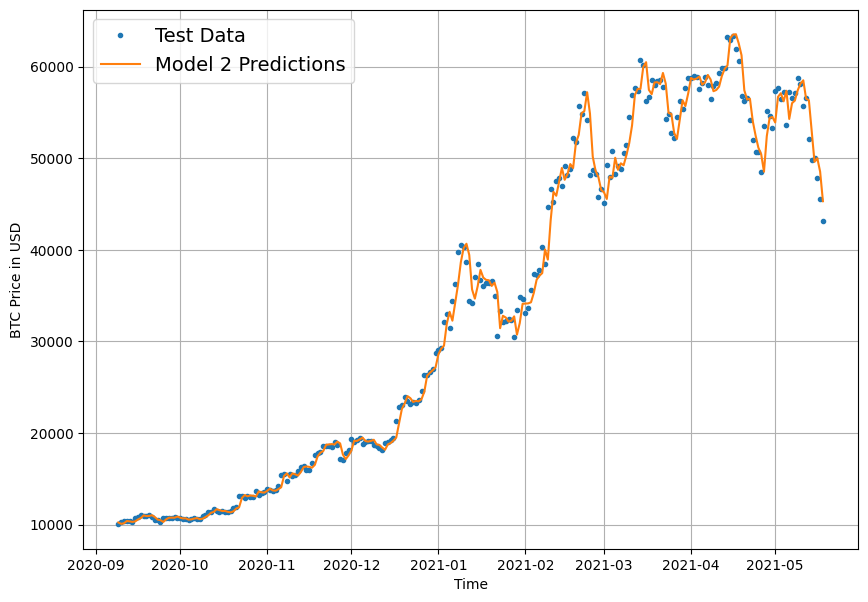

In [59]:
offset = 300
plt.figure(figsize = (10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps= X_test[-len(test_windows):], values = test_labels[:, 0], start= offset, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_2_preds, start = offset, format = "-", label = "Model 2 Predictions")

## Model 3: Dense (window, horizon =7)

In [60]:
WINDOW_SIZE = 30
HORIZON =7

full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)

Window indexes: 
[[   0    1    2 ...   34   35   36]
 [   1    2    3 ...   35   36   37]
 [   2    3    4 ...   36   37   38]
 ...
 [2748 2749 2750 ... 2782 2783 2784]
 [2749 2750 2751 ... 2783 2784 2785]
 [2750 2751 2752 ... 2784 2785 2786]], (2751, 37)


Windowed array: 
[[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]




In [61]:
len(full_windows), len(full_labels)

(2751, 2751)

In [62]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [63]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct the model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") # linear activation is the same as having no activation
], name = "model_3_dense.keras")

# 2. Compile the model
model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["mae", "mse"])

# 3. Fit the model
model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name =model_3.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 3014.7661 - mae: 3014.7661 - mse: 31824768.0000 - val_loss: 3024.2668 - val_mae: 3024.2668 - val_mse: 23557712.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 618.8264 - mae: 618.8264 - mse: 1635429.1250 - val_loss: 2390.5562 - val_mae: 2390.5562 - val_mse: 16272475.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 458.9191 - mae: 458.9191 - mse: 1022531.0000 - val_loss: 2184.4604 - val_mae: 2184.4604 - val_mse: 13690376.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 419.7257 - mae: 419.7257 - mse: 874739.6875 - val_loss: 2060.7800 - val_mae: 2060.7800 - val_mse: 12521455.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 394.7499 - mae: 394.7499 - mse: 779870.1250 - val_loss: 1896.4138 - val_mae: 1896.4138 - val_mse: 10875779.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 378.6026 - mae: 378.6026 - mse: 708935.6875 - val_loss: 1838.5007 - val_mae: 18

In [64]:
# Evaluate model_3 on test data
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 631.8845 - mae: 631.8845 - mse: 1604695.2500


[1262.710205078125, 1262.710205078125, 5465307.5]

In [65]:
# Load the best version of model_3 and evaluate it
model_3 = tf.keras.models.load_model("/kaggle/working/model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 630.2435 - mae: 630.2435 - mse: 1586193.2500


[1253.6129150390625, 1253.6129150390625, 5416492.0]

In [66]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data = test_windows)
model_3_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9397.759 , 9512.493 , 9313.581 , 9408.727 , 9409.286 , 9491.86  ,
        9142.5625],
       [9214.388 , 9202.364 , 9079.272 , 9260.98  , 9179.685 , 9168.28  ,
        9067.607 ],
       [9011.296 , 8982.528 , 8888.424 , 8994.184 , 9028.9795, 9020.19  ,
        8857.175 ],
       [9100.327 , 9128.9   , 8879.3545, 9026.594 , 9110.117 , 9103.154 ,
        8711.817 ],
       [8970.47  , 9060.8955, 9070.923 , 9042.356 , 9102.924 , 8876.776 ,
        8631.656 ]], dtype=float32)>

In [67]:
# Evaluate model_3 results
mdoel_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
mdoel_3_results

{'mae': 1253.6128,
 'mape': 5.625341,
 'mase': 2.2307339,
 'mse': 5416492.0,
 'rmse': 2327.3357}

## Make our evaluation function work for larger horizons

In [68]:
# Create a funciton to take in model predictions and truth values and return evaluations
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  # Calculate evaluation metrics
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))  # Mean Absolute Error
  mse = tf.reduce_mean(tf.square(y_true - y_pred))  # Mean Squared Error
  rmse = tf.sqrt(mse)  # Root Mean Squared Error
  mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
  mase = mean_absolute_scaled_error(y_true, y_pred)  # Mean Absolute Scaled Error

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single dimension)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy()}

In [69]:
# Model 3 resutls after accounting for higher dimensionality
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
mdoel_3_results

{'mae': 1253.6128,
 'mape': 5.625341,
 'mase': 2.2307339,
 'mse': 5416492.0,
 'rmse': 2327.3357}

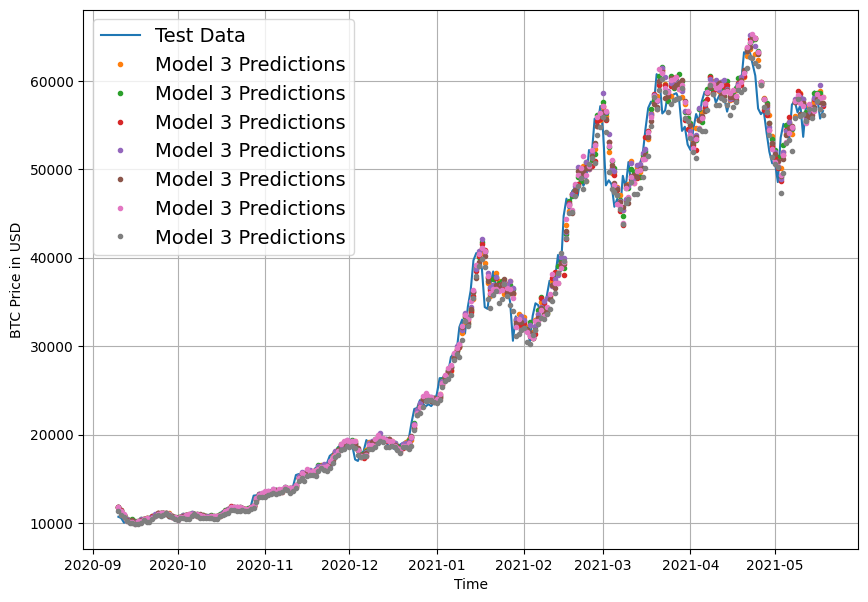

In [70]:
offset = 300
plt.figure(figsize = (10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps= X_test[-len(test_windows):], values = test_labels[:, 0], start= offset, format = "-", label  = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_3_preds, start = offset,  label = "Model 3 Predictions")

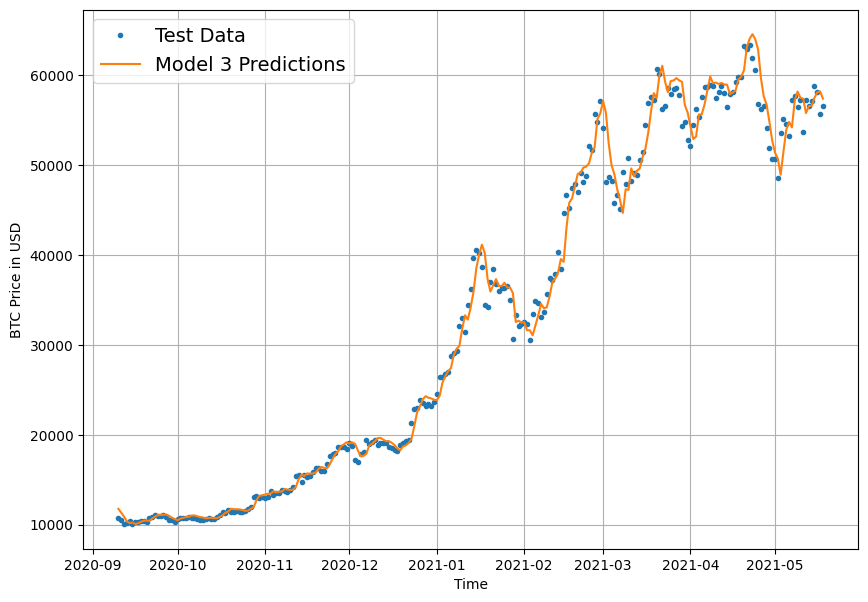

In [71]:
offset = 300
plt.figure(figsize = (10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps= X_test[-len(test_windows):], values = test_labels[:, 0], start= offset,  label  = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis =1), start = offset, format = "-", label = "Model 3 Predictions")

## Which of our models is performing the best so far?

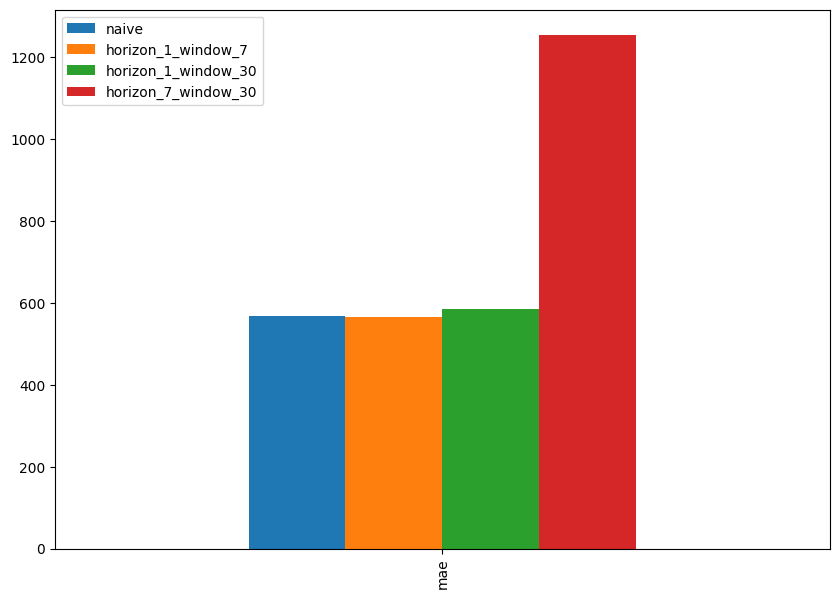

In [72]:
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"]
}, index = ["mae"]).plot(figsize= (10,7), kind = "bar");

## Model 4: Conv1D

In [73]:
# On observing the previous models, a model with horizon 1 and window size 7 performs the best
HORIZON =1
WINDOW_SIZE =7

In [74]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexes: 
[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]], (2780, 8)


Windowed array: 
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]




(2780, 2780)

In [75]:
# Create training nad testing sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`

In [76]:
# Check data input shape
train_windows[0].shape

(7,)

In [77]:
# Before we pass our data into the Conv1D layer, the data has to be reshaped so that it can work
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [78]:
# To account for the input_dim, we need to expand the dimension of the data
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis =1)) # add an extra dimension

In [79]:
# Test out the lambda layer
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape: \n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape: 
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [80]:
tf.random.set_seed(42)

# Create Conv1D layer
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis =1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides= 1, padding = "causal", activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_4_conv1D.keras")

# Compile the model
model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_4.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name =model_4.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2380.6326 - val_loss: 934.3734
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323.4720 - val_loss: 1526.2085
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 213.5309 - val_loss: 952.5245
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 164.3673 - val_loss: 973.7162
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160.6768 - val_loss: 950.9340
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 157.7667 - val_loss: 923.7147
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155.5593 - val_loss: 902.9124
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 153.4542 - val_loss: 895.9938
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.5502 - val_loss: 883.2807
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 149.5712 - val_loss: 861.5385
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 147.4324 - val_loss: 848.8312
Epoch 12/100
18/

In [81]:
model_4.summary()

Model: "model_4_conv1D.keras"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [82]:
# Evaluate the model
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 282.3466


566.0715942382812

In [83]:
# Load in the best performing model
mdoel_4 = tf.keras.models.load_model("/kaggle/working/model_experiments/model_4_conv1D.keras", safe_mode = False) # the safe mode parameter is used so that the Lambda layer can be laoded and used
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 282.3465 


566.0715942382812

In [84]:
# Make predictions
model_4_preds = model_4.predict(test_windows)
model_4_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[[8855.761]],

       [[8778.773]],

       [[9024.729]],

       [[8777.4  ]],

       [[8731.92 ]]], dtype=float32)

In [85]:
tf.squeeze(test_labels).shape

TensorShape([556])

In [86]:
tf.squeeze(model_4_preds).shape

TensorShape([556])

In [87]:
# Evaluate the results
model_4_results = evaluate_preds(y_true = (tf.squeeze(test_labels)),
                                 y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 566.0716,
 'mape': 2.5308723,
 'mase': 0.994431,
 'mse': 1162381.1,
 'rmse': 1078.1378}

## Model 5: RNN (LSTM)

In [88]:
# passing shape = (WINDOW_SIZE,) instead of shape = (WINDOW_SIZE) because the shape is one-dimensional and TensorFlow expects a tuple
# Explicit output shape# x = layers.LSTM(128,
# While normally we do not need to explicitly mention the output shape for a lamda layer, sometimes TensorFlow does need it
# x = layers.LSTM(128,return_sequences = True)(x)
import tensorflow as tf
from tensorflow.keras import layers

# Model definition
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(
    lambda x: tf.expand_dims(x, axis=1),
    output_shape=(1, WINDOW_SIZE)
)(inputs)
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name="model_5_LSTM.keras")

# Compile the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fit the model
model_5.fit(train_windows, train_labels, epochs = 100, verbose = 1, batch_size = 128, validation_data = (test_windows, test_labels), callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 2982.1587 - val_loss: 13986.5527
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1780.0449 - val_loss: 1478.4763
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 284.6352 - val_loss: 1527.1587
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 220.3869 - val_loss: 1067.2417
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 183.7890 - val_loss: 974.3595
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.5882 - val_loss: 920.8120
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 166.3927 - val_loss: 973.3156
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 161.4853 - val_loss: 1050.0806
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 183.2860 - val_loss: 1038.0096
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 176.7906 - val_loss: 1019.2834
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173.8161 - val_loss: 1020.9059
Epoch 1

In [89]:
# # Load
# loaded_model = tf.keras.models.load_model("./model_experiments/model_5_LSTM.keras", safe_mode=False)
# loaded_model.evaluate(test_windows, test_labels)

In [90]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 287.9045


571.6709594726562

In [91]:
# Make predictions with our LSTM model
model_5_preds = model_5.predict(test_windows)
model_5_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


array([[8873.835 ],
       [8766.428 ],
       [8987.446 ],
       [8790.4795],
       [8724.995 ]], dtype=float32)

In [92]:
test_labels.shape

(556, 1)

In [93]:
model_5_preds.shape

(556, 1)

In [94]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true = (test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 571.671,
 'mape': 2.5926287,
 'mase': 1.0042677,
 'mse': 1183768.2,
 'rmse': 1088.0111}

In [95]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Make a multivariate time series dataset

Before adding in ay feature, we need to think upon which feature to add. For instance, one of the info you can add into the model could be if I ate pizza on that day. But, would that be a good feature to add?

Again, we would not know until we have not modelled the data and evalaute the model. Howeverm from the whole lot of possibilities, the realtionship between me eating pizza on a given day and the price of Bitcoin on a day is non-existent.

One such event, which has some literal effect on the price of Bitcoin is `Bitcoin halving events`

In [96]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [97]:
# Let's add bitcoin halving events in this dataset
block_reward_1 = 50 # 3 Jan 2009 -this won't be useful to us cause our data starts from October 2013
block_reward_2 = 25 # 8 Nov 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [98]:
# Create data ranges of where specific block_reward values will be going
block_reward_2_days = (block_reward_3_datetime- bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [99]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature in our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [100]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


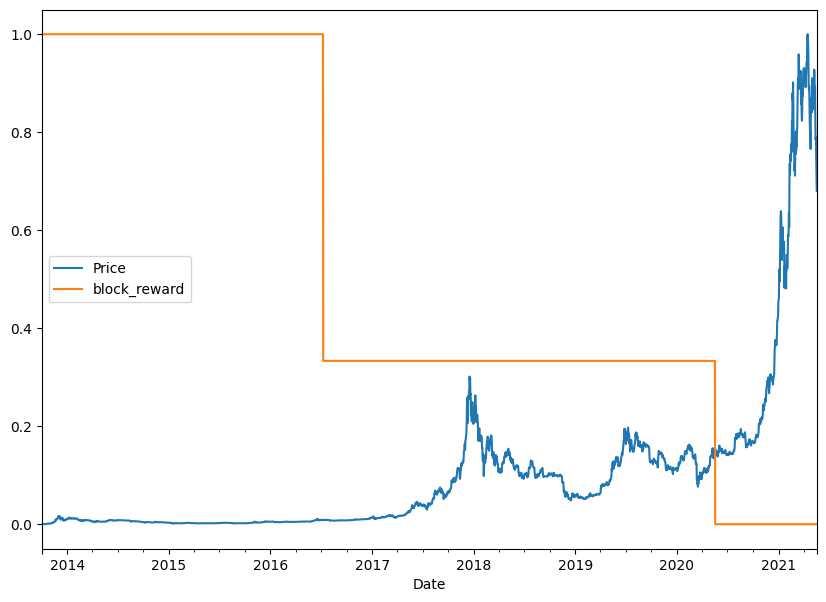

In [101]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize = (10,7));

## Making a windowed dataset with pandas
Previously we used the helper functions to convert the univariate data into a windowed dataset.

However, since we have multivariate data, these functions won't work.

In this case, we will be suing `pandas.DataFrame.shift()` to serve the purpose of windowing our multivariate dataset.

In [102]:
HORIZON = 1
WINDOW_SIZE = 7

In [103]:
# Make a copy of the Bitcoin historical data with block reward
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i+1)

bitcoin_prices_windowed.head(10)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


what we've done is created a way to window our dataset directly from pandas dataframe. Once we remove the rows with NaN values, we can have something like this:
```
[0, 1, 2, 3, 4, 5, 6, block_reward]  --> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] --> [8]
```
and so on..

In [104]:
# Create X (windows) and y (horizons)
X = bitcoin_prices_windowed.dropna().drop("Price", axis =1).astype(np.float32) # the reason for converting the data into float32 is because tensorflow likes it in this way
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [105]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [106]:
# Make train and test sets using indexing
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [107]:
tf.random.set_seed(42)

# Make the multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name = "model_6_dense_multivariate.keras")

# Compile the model
model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_6.fit(X_train,
            y_train,
            epochs = 100,
            batch_size = 128,
            verbose = 1,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 1968.6587 - val_loss: 1400.8820
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254.5363 - val_loss: 969.7911
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 182.9333 - val_loss: 1106.1440
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.2583 - val_loss: 905.8579
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155.4469 - val_loss: 848.4349
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 147.4669 - val_loss: 780.8638
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136.1689 - val_loss: 726.7072
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 134.3499 - val_loss: 690.2094
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125.0924 - val_loss: 662.7408
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123.3721 - val_loss: 641.5561
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122.9357 - val_loss: 639.1019
Epoch 12/100
18

In [108]:
# Evaluate the multivariate model
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 294.4215


585.6371459960938

In [109]:
# Laod in and evaluate the best performing model
model_6 = tf.keras.models.load_model("/kaggle/working/model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 282.5892 


566.9818725585938

In [110]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8833.305, 8779.973, 9028.157, 8775.025, 8735.038], dtype=float32)>

In [111]:
# Evaluate predictions to get evaluation metrics
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'mae': 566.9819,
 'mape': 2.540776,
 'mase': 0.9960301,
 'mse': 1163402.9,
 'rmse': 1078.6116}

In [112]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Model 7: N-BEATS algorithm

the follwoing sections will give an insight into:
* Replicating paper with TensorFlow code
* Use of TensorFlow layer subclassing (to make custom layers)
* Useing Functional API to create custom API
* Potentially getting state of the art solution to our problem

### Building and testing the N-BEATS block layer

Since N-BEATS block layer is not something which is pre-built in TensorFlow, we have to make it from scratch.

In order to create custom layers and mdoels, we can use TensorFlow subclassing.

In [113]:
# Create NBeatBlock custom layer
# For a more research-focused information into this, refer the figure 1 and section 3.1 of the N-BEATS paper
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int, # self explanantory
               theta_size: int, # output shape, as the number of theta is the number of output neurons
               horizon: int, # horizon is same as before, the timesteps for which we want to make predictions
               n_neurons: int, # n_neurons refer to the number of neurons in each of the layers of the fully connected layers
               n_layers: int, # n_layers refer to the number of layers in the fully-connected layer of the first block of N-BEATS algorithm
               **kwargs): # takes care of all of the arguments for the parent class such as input_shape, trainable, name, etc.
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers and each of the layers has the ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range (n_layers)]

    # Output of the block is through a theta layer with a linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name = "theta")

  def call(self, inputs): # the call method is the calculation/execution that goes beinhd the curtains when the layer is called
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:] # herein, the first : means take all elements of the batch and then the second slicing can be better explained as:
    # Output the backcast and forecast from theta
    # `theta[:, :self.input_size]`: The first `:` selects all elements in the batch dimension (batch_size).
    # The second slicing `:self.input_size` selects the first `self.input_size` elements of each row (backcast).
    # `theta[:, -self.horizon:]`: The first `:` again selects all elements in the batch dimension.
    # The slicing `-self.horizon:` selects the last `self.horizon` elements of each row (forecast).
    return backcast, forecast

Let's check the NBeatBlock layer using some dummy data

In [114]:
# Setup dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size= WINDOW_SIZE + HORIZON, # window size for backcast and horizon for forecast
                                       horizon = HORIZON,
                                       n_neurons= 128,
                                       n_layers = 4)

In [115]:
# Create dummy inputs (they should have the same size as input_shape)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) +1 , axis = 0) # the input size should have ndim=2
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [116]:
# Pass dummy inputs to the dummy NBeatBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.15691715 -0.16377473 -0.34291536  0.10909057 -0.44963348 -0.06099515
 -0.27987307]
Forecast: -0.21068412065505981


### Preparing data for the N-BEATS algorithm using `tf.data`

In [117]:
HORIZON = 1
WINDOW_SIZE = 7

In [118]:
# Create N-BEATS data inputs as N-BEATS works with univariate data
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [119]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)
bitcoin_prices_nbeats

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Price,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [120]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis =1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split = int(len(X)* 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [121]:
# Making our dataset performant by using the tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping them together. After zippin, they'll look like this -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch the data
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The values of these hyperparameters are mainly derived from the Table 18 on the paper.

In [122]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for the residual connections

Before we can craft our N-BEATS mdoel, we need two layers for the residual connections (add and subract)

In [123]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [124]:
tensor_1.numpy(), tensor_2.numpy()

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32))

In [125]:
 # Subract
subracted = layers.subtract([tensor_1, tensor_2])
subracted.numpy()

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)

In [126]:
# Add
added = layers.add([tensor_1, tensor_2])
added.numpy()

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this will be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using Keras functional API)
3. Make the inital backcast and forecast for the model with the layer created in `(1)`
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` calss eithin the for loop in `(4)` to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model`
8. Compile the model with MAE loss and Adam optimizer with default setting as per section 5.2 of the N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we will use a couple of callbacks such as:
  * Early stopping: We will interrupt the training process if the model stops improving
  * Reduce LR on Plateau: reduce the amount with which weights are updated when the model stops improving

In [127]:
%%time

tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size= INPUT_SIZE,
                                 theta_size= THETA_SIZE,
                                 horizon= HORIZON,
                                 n_neurons= N_NEURONS,
                                 n_layers= N_LAYERS,
                                 name = "InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE,), name = "stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS -1)): #first stack is already created in 1
  # 5. Use NBeatsBlock to calculate the backcast and forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name= f"subract_{i}")
  forecast = layers.add([forecast, block_forecast], name= f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs = stack_input,
                         outputs = forecast,
                         name= "model_7_NBEATS")

# 8. Compile the model
model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# 9. Fit the mmodel with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose =1,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                              patience = 100,
                                                              verbose =1)])

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - loss: 2789.0098 - val_loss: 528813.6875 - learning_rate: 0.0010
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 14107.1484 - val_loss: 3014.6096 - learning_rate: 0.0010
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 704.1276 - val_loss: 8437.0098 - learning_rate: 0.0010
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 786.2021 - val_loss: 9507.7051 - learning_rate: 0.0010
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2480.9663 - val_loss: 3828.5427 - learning_rate: 0.0010
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 935.3347 - val_loss: 5590.9058 - learning_rate: 0.0010
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1380.9634 - val_loss: 10142.9873 - learning_rate: 0.0010
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1549.9380 - val_loss: 7603.8228 - learning_rate: 0.0010
Epoch 9/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 803.0260 - val_loss

In [128]:
# evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 581.5425


581.54248046875

In [129]:
# Make predictions with N-BEATS mdoel
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8892.467, 8799.623, 9003.92 , 8788.968, 8732.595, 8728.902,
       8663.538, 8530.643, 8456.455, 8506.295], dtype=float32)>

In [130]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 581.54254,
 'mape': 2.6190965,
 'mase': 1.0216092,
 'mse': 1208008.0,
 'rmse': 1099.0941}

In [131]:
model_1_results

{'mae': 565.2597,
 'mape': 2.537767,
 'mase': 0.99300474,
 'mse': 1164934.2,
 'rmse': 1079.3212}

### Plotting the N-BEATS architecture

In [132]:
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes = True)

## Model 8: Creating an ensemble (stacking different models together)

In [133]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of modles (using different loss functions)

In [134]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns = ["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
  """
  # Make empty list to store the trained models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range (num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialise dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer="he_normal", activation = "relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation = "relu"),
          layers.Dense(HORIZON)
      ])

      # Compile the mdoel with the current loss function
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", "mse"])

      # Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                    patience=200,
                                                    restore_best_weights=True),
                    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                        patience=100,
                                                        verbose=1)
                ])

      # Append the fitted model to the list of ensemble models list
      ensemble_models.append(model)
  return ensemble_models

In [135]:
%%time
# Get list of trained ensemble model
ensemble_models = get_ensemble_models(num_iter =5,
                                      num_epochs =1000)

Optimizing model by reducing mae for 1000 epochs, model number: 0

Epoch 756: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing mse for 1000 epochs, model number: 0

Epoch 223: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 323: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing mape for 1000 epochs, model number: 0

Epoch 242: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 342: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing mae for 1000 epochs, model number: 1

Epoch 520: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 620: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing mse for 1000 epochs, model number: 1

Epoch 176: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 276: ReduceLROnPlateau

In [136]:
len(ensemble_models)

15

In [137]:
ensemble_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Sequential name=sequential_2, built=True>,
 <Sequential name=sequential_3, built=True>,
 <Sequential name=sequential_4, built=True>,
 <Sequential name=sequential_5, built=True>,
 <Sequential name=sequential_6, built=True>,
 <Sequential name=sequential_7, built=True>,
 <Sequential name=sequential_8, built=True>,
 <Sequential name=sequential_9, built=True>,
 <Sequential name=sequential_10, built=True>,
 <Sequential name=sequential_11, built=True>,
 <Sequential name=sequential_12, built=True>,
 <Sequential name=sequential_13, built=True>,
 <Sequential name=sequential_14, built=True>]

### Make predictions with our ensemble model

In [138]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    ensemble_preds.append(model.predict(data))
  return tf.constant(tf.squeeze(ensemble_preds))

In [139]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
CPU times: user 1.64 s, sys: 74.6 ms, total: 1.72 s
Wall time: 1.71 s


TensorShape([15, 556])

In [140]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_preds)
ensemble_results

{'mae': 577.9948,
 'mape': 2.6367857,
 'mase': 1.0153768,
 'mse': 1172447.9,
 'rmse': 1082.7963}

In [141]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8772.593, 8773.786, 9072.526, 8730.347, 8725.772, 8724.669,
       8643.787, 8499.479, 8437.139, 8524.323], dtype=float32)>

In [142]:
ensemble_median = np.median(ensemble_preds, axis =0)
ensemble_median[:10]

array([8780.174 , 8773.3   , 9066.21  , 8722.069 , 8725.106 , 8742.914 ,
       8643.614 , 8497.903 , 8433.0625, 8523.524 ], dtype=float32)

In [143]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_mean)
ensemble_results

{'mae': 567.28815,
 'mape': 2.5710835,
 'mase': 0.99656814,
 'mse': 1144669.2,
 'rmse': 1069.8922}

In [144]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median)
ensemble_results

{'mae': 567.18,
 'mape': 2.5515563,
 'mase': 0.9963781,
 'mse': 1150572.9,
 'rmse': 1072.6476}

In [145]:
model_1_results

{'mae': 565.2597,
 'mape': 2.537767,
 'mase': 0.99300474,
 'mse': 1164934.2,
 'rmse': 1079.3212}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

One way to get the 95% confidence predictions intervals for a deep learning models is the bootstrap method:
1. Take the predictions from a number of randomly initialised models (in our case we'll do it from the ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (this is so because we assume here that the data we have is a normal distribution one. For the same purpose, we initiated the weights with "he_normal". And in normal distribution , 95% of the datapoints lie ine +1.96 times standard deviation to -1.96 times standard deviation)
4. To the get prediction interval upper and lower bounds, add and subract the value obtained in (3) to the mean/median of the predictions made in (1).

In [146]:
# find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis =0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis =0)
  upper = preds_mean + interval
  lower = preds_mean - interval

  return lower, upper

In [147]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8719.668 ,  8720.379 ,  9016.225 ,  8667.557 ,  8653.402 ,
         8615.87  ,  8577.847 ,  8446.56  ,  8366.868 ,  8487.953 ,
         8156.6016,  8029.537 ,  7992.428 ,  7568.576 ,  7214.4175,
         7221.177 ,  7010.475 ,  7155.5605,  7032.5737,  7412.36  ,
         7353.211 ,  7648.929 ,  7512.5093,  7317.0947,  7265.7393,
         7244.895 ,  7172.333 ,  7337.24  ,  7467.0654,  7480.83  ,
         7503.564 ,  7268.6543,  7184.3687,  7147.14  ,  7151.361 ,
         7195.7812,  7024.502 ,  7050.7256,  6823.865 ,  6536.1387,
         7283.9697,  7060.102 ,  7018.935 ,  7162.1978,  7146.814 ,
         7146.383 ,  7140.4736,  7172.487 ,  7154.1655,  7173.1875,
         7265.4595,  7351.012 ,  7205.4844,  7116.2896,  7119.838 ,
         6921.262 ,  7234.3774,  7292.789 ,  7281.866 ,  7659.3535,
         7999.724 ,  8097.5933,  7814.453 ,  8015.5225,  8044.852 ,
         8099.463 ,  8057.099 ,  8658.69  ,  8866.353 ,  8688.766 ,

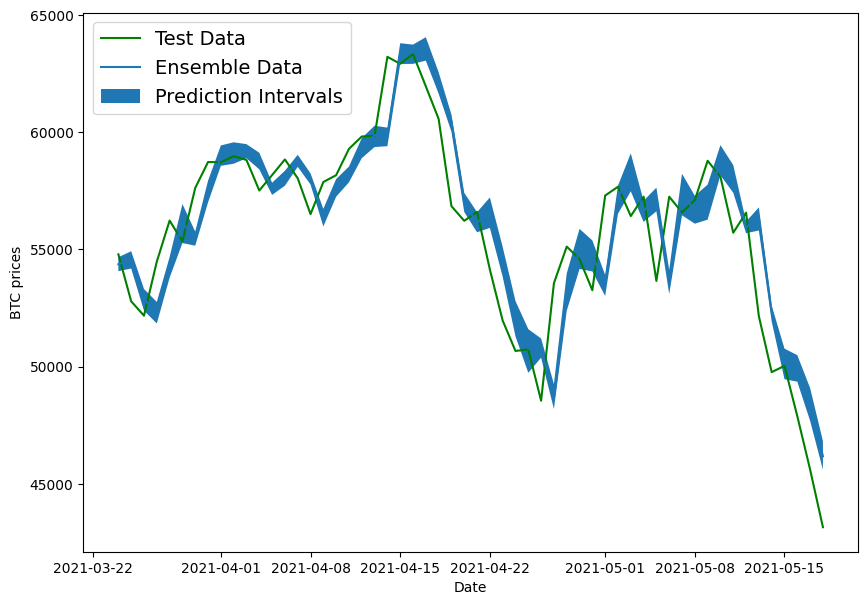

In [148]:
# Get the median/mean
ensemble_median = np.median(ensemble_preds, axis = 0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions lie between)
offset = 500
plt.figure(figsize = (10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "-", label = "Ensemble Data")
plt.xlabel("Date")
plt.ylabel("BTC prices")
# To plot the upper and lower bounds, we can use matplotlib's fill_between
plt.fill_between(X_test.index[offset:],
                 lower[offset:],
                 upper[offset:],
                 label = "Prediction Intervals")
plt.legend(loc= "upper left", fontsize =14)
plt.show();

## Model 9: Train model on full historical data to make predictions into the future

In [149]:
bitcoin_prices_windowed.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [150]:
# Train data on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy()
y_all =bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [151]:
len(X_all), len(y_all)

(2780, 2780)

In [152]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Prefetch and Batch the data
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [153]:
tf.random.set_seed(42)

# Construct the model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_9_future_model")

# Compile the model
model_9.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_9.fit(dataset_all,
            epochs = 100,
            verbose = 1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - loss: 3724.6382
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2601.9473
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1549.6584
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 527.7144
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 507.1297
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 786.5527
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 608.0024
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 268.6643
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 332.6635
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 428.2422
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 316.6922
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 216.3182
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 281.6895
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 247.7451
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 219.0892

### Make predictions into the future


For a time series model, you have to train the model everytime we want a prediction.

In [154]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future, we need a function that:
1. Takes as input:
  * A list of values (Bitcoin historical data)
  * A trained model (`model_9` in this case)
  * A window into the future to predict (`INTO_FUTURE` variable in this case)
  * The window size a model was trained on (`WINDOW_SIZE` variable): The model can predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts and extracts last `WINDOW_SIZE` values from the input values.
3. Loop `INTO_FUTURE` times making prediction on `WINDOW_SIZE` sequences which update to remove the forst value and append the latest prediction.

In [155]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size = WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after value ends
  Returns future forecasts as a list of floats
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):
    # Predict on the last window then append it again and again. Eventually, the model will be using its own prediction to make future predictions
    future_pred = model.predict(tf.expand_dims(last_window, axis= 0))
    print(f"Predictions are based on \n{(last_window)}\nThe predicted values are: \n{tf.squeeze(future_pred)}")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [156]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values = y_all,
                                        model= model_9,
                                        into_future= INTO_FUTURE,
                                        window_size = WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predictions are based on 
[56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086]
The predicted values are: 
55324.2578125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predictions are based on 
[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55324.2578125 ]
The predicted values are: 
52240.9296875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions are based on 
[49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55324.2578125  52240.9296875 ]
The predicted values are: 
46988.671875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions are based on 
[50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55324.2578125  52240.9296875  46988.671875  ]
The predicted values are: 
48170.53515625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predictions are based on 
[47885.62525472 45604.61575361 43144.47129086 55324.2578125
 52240.9296875  46988.6

In [157]:
future_forecast

[55324.258,
 52240.93,
 46988.67,
 48170.535,
 47923.395,
 47249.438,
 46878.336,
 53433.383,
 50753.867,
 45861.523,
 47761.656,
 48834.453,
 48429.723,
 48320.87]

In [158]:
def get_future_dates(start_date, into_future, offset=1):
    """
    Returns an array of datetime values ranging from start_date to start_date + into_future
    """
    start_date = start_date + np.timedelta64(offset, "D") # specify the start date, in "Day" format
    end_date = start_date +np.timedelta64(into_future, "D") #specify the end date
    return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between the start and the end date

In [159]:
# Last timestep of timesteps (this needs to be in np.datetime64 format which it currently is in)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [160]:
# Get next two weeks of timesteps 
next_time_steps = get_future_dates(start_date = last_timestep,
                                  into_future = INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [161]:
# Insert last time step into next time steps and future forecast so that there is no gap in the plot
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast,0, btc_price[-1])
next_time_steps, future_forecast 

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55324.258, 52240.93 , 46988.67 , 48170.535, 47923.395,
        47249.438, 46878.336, 53433.383, 50753.867, 45861.523, 47761.656,
        48834.453, 48429.723, 48320.87 ], dtype=float32))

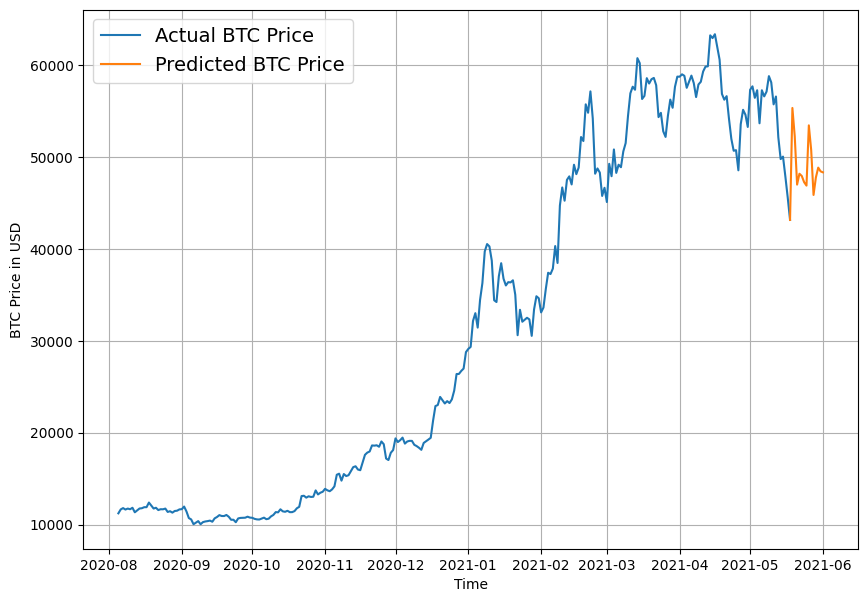

In [162]:
# Plot future price predictions of Bitcoin
plt.figure(figsize= (10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start = 2500, format="-", label = "Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format= "-", label="Predicted BTC Price")

## Model 10: The Turkey problem

In [163]:
# Let's introduce a turkey problem to our BTC data (the price of BTC falls 100x in a day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [164]:
# Manufacture an extra price on the end (to showcase the turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [165]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

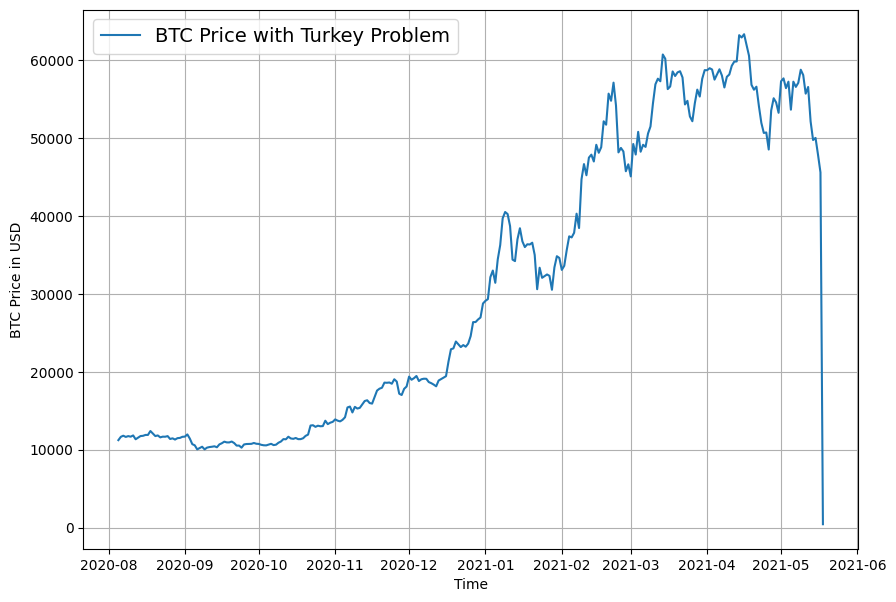

In [166]:
plt.figure(figsize= (10, 7))
plot_time_series(timesteps = btc_timesteps_turkey,
                values = btc_price_turkey,
                format = "-",
                label = "BTC Price with Turkey Problem",
                start = 2500)

In [167]:
# Create turkey train and test sets for turkey problem data 
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size = WINDOW_SIZE, horizon= HORIZON)


X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

len(X_train), len(X_test), len(y_train), len(y_test)

Window indexes: 
[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]], (2780, 8)


Windowed array: 
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361   431.44471291]]




(2224, 556, 2224, 556)

### Build a turkey model (model to predict on turkey)

In [168]:
# Clone model_1 architecture for turkey model 
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"

# Compile the model 
turkey_model.compile(loss = "mae",
                    optimizer = tf.keras.optimizers.Adam())

# Fit the model 
turkey_model.fit(X_train, y_train,
                epochs = 100,
                verbose = 1,
                batch_size = 128,
                validation_data = (X_test, y_test),
                callbacks = [create_model_checkpoint(model_name = turkey_model.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 1668.7159 - val_loss: 2952.9082
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 386.2661 - val_loss: 1491.2850
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 247.9904 - val_loss: 1443.5488
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 223.2543 - val_loss: 1303.3667
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 211.5117 - val_loss: 1248.0897
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 197.4243 - val_loss: 1187.9650
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 183.0695 - val_loss: 1105.1461
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173.0285 - val_loss: 1053.1870
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 166.8059 - val_loss: 1021.8678
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160.9461 - val_loss: 972.8789
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 153.1080 - val_loss: 933.5411
Epoch 12

In [169]:
# Evaluate the turkey model 
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 302.4531 


657.7636108398438

In [170]:
# Load the best performing turkey model and evaluate on the test data
# turkey_model = tf.keras.models.load_model("")
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 302.4531 


657.7636108398438

In [171]:
# Make predictions with the turkey model 
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8894.46 , 8835.1  , 9089.945, 8825.464, 8777.552, 8761.381,
       8734.252, 8562.098, 8496.337, 8574.347], dtype=float32)>

In [172]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true = y_test,
                               y_pred = turkey_preds)
turkey_results

{'mae': 17187.988,
 'mape': 122.17834,
 'mase': 26.598467,
 'mse': 618690560.0,
 'rmse': 24873.492}

In [173]:
model_1_results

{'mae': 565.2597,
 'mape': 2.537767,
 'mase': 0.99300474,
 'mse': 1164934.2,
 'rmse': 1079.3212}

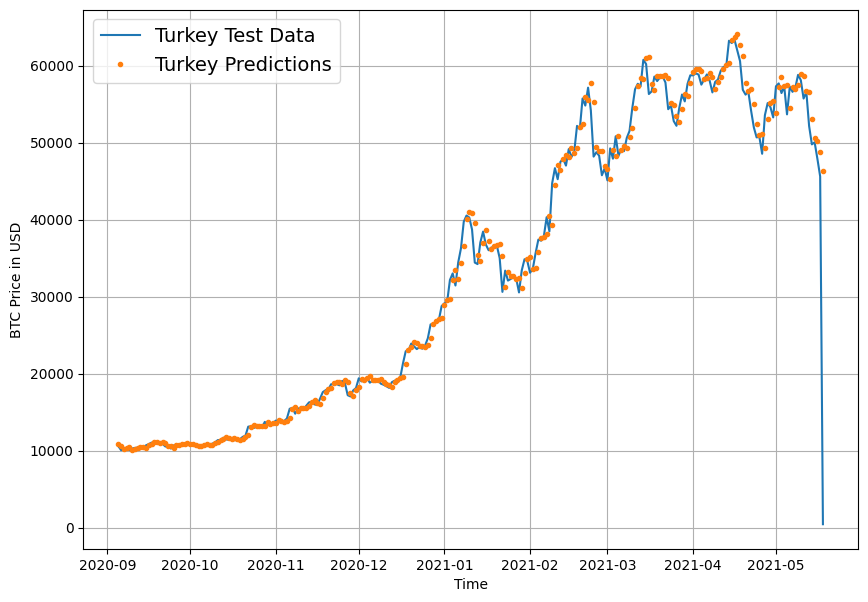

In [174]:
plt.figure(figsize= (10, 7))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                values = btc_price_turkey[-len(y_test):],
                format = "-",
                label = "Turkey Test Data",
                start = offset)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                values = turkey_preds,
                label = "Turkey Predictions",
                start = offset);

## Compare Models

In [175]:
# Compare different model results, w= window_size and h= horizon 
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "model_1_dense_w7_h1": model_1_results,
    "model_2_dense_w30_h1": model_2_results,
    "model_3_dense_w30_h7": model_3_results,
    "model_4_CONV1D": model_4_results,
    "model_5_LSTM": model_5_results,
    "model_6_multivariate": model_6_results,
    "model_7_NBEATS": model_7_results,
    "model_8_ensemble": ensemble_results,
    "model_10_turkey": turkey_results
}).T

In [176]:
model_results.head()

,mae,mape,mase,mse,rmse
naive_model,567.980225,2.516525,0.999570,1147547.000,1071.236206
model_1_dense_w7_h1,565.259705,2.537767,0.993005,1164934.250,1079.321167
model_2_dense_w30_h1,585.902954,2.657116,1.024164,1203665.250,1097.116821
model_3_dense_w30_h7,1253.612793,5.625341,2.230734,5416492.000,2327.335693
model_4_CONV1D,566.071594,2.530872,0.994431,1162381.125,1078.137817


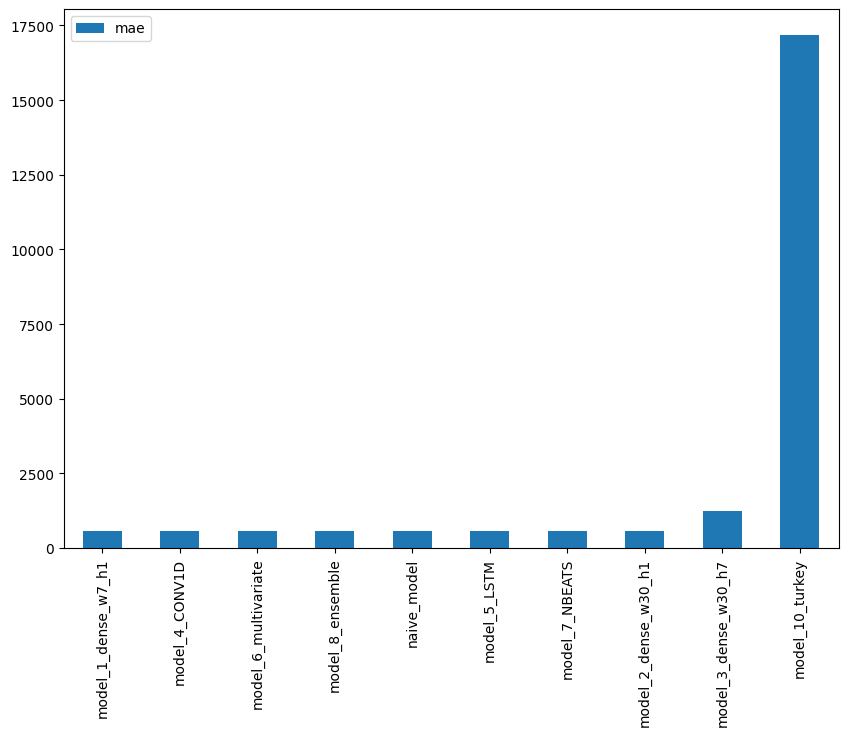

In [178]:
model_results[["mae"]].sort_values(by="mae").plot(figsize = (10, 7), kind = "bar");